## Introduction

### Project 06 - Linear Regression

This is a project to train a machine learning model to predict healthy life expectancy based on data from the World Happiness Data Csv in this folder.

The Features are GDP per capita, Generosity score, Social support score, Perceptions of corruption score, and Freedom to make life choices score. 

Happiness ranking is based on "Ladder Score".  This was taken from a Gallup poll where individuals were asked to rank their happiness as if it were rungs on a ladder.  The happier they were the Higher the score.  Other features were added to the data set to determine if these played a factor in how happy the people considered themselves.  

### Model

We will attempt to build a linear regression model that will predict a happiness/Ladder score based on input of several features.  




# Section 1 Imports


In [59]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression

### Section 1.1 Data Inspection

In [60]:
data_frame = pd.read_csv("world_happiness_2024.csv", sep=';')
print(data_frame.keys())

data_frame.replace(',','.',regex=True, inplace=True)

data_frame.head(n=10)
data_frame.tail(n=15)
# remove commas from dataframe

data_frame['Ladder score'] =data_frame['Ladder score'].astype(float)
data_frame['GDP per capita'] =data_frame['GDP per capita'].astype(float)
data_frame['Generosity'] =data_frame['Generosity'].astype(float)
data_frame['Social support'] =data_frame['Social support'].astype(float)
data_frame['Healthy life expectancy'] =data_frame['Healthy life expectancy'].astype(float)
data_frame['Freedom to make life choices'] =data_frame['Freedom to make life choices'].astype(float)
data_frame['Perceptions of corruption'] =data_frame['Perceptions of corruption'].astype(float)
data_frame.info()

Index(['Ranking', 'Country', 'Regional indicator', 'Ladder score',
       'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ranking                       140 non-null    int64  
 1   Country                       140 non-null    object 
 2   Regional indicator            140 non-null    object 
 3   Ladder score                  140 non-null    float64
 4   GDP per capita                140 non-null    float64
 5   Social support                140 non-null    float64
 6   Healthy life expectancy       140 non-null    float64
 7   Freedom to make life choices  140 non-null    float64
 8   Generosity                    140 non-null    float

In [61]:
df_sorted=data_frame.sort_values(by='Ranking')
print(df_sorted)

     Ranking           Country  ... Generosity  Perceptions of corruption
39         1           Finland  ...    0.35347                    0.94966
31         2           Denmark  ...    0.50792                    0.95358
52         3           Iceland  ...    0.64455                    0.31728
120        4            Sweden  ...    0.55252                    0.91078
58         5            Israel  ...    0.38224                    0.33528
..       ...               ...  ...        ...                        ...
26       136  Congo (Kinshasa)  ...    0.47074                    0.12548
112      137      Sierra Leone  ...    0.45249                    0.09268
72       138           Lesotho  ...    0.20480                    0.14774
71       139           Lebanon  ...    0.16876                    0.05003
0        140       Afghanistan  ...    0.22638                    0.15383

[140 rows x 10 columns]


### Notes

There are 140 rows of data each representing one country.  The numerical data includes a score or number that is a calculation of the feature. For example the perception of corruption is a number that if its higher it implies that people percieve their country to be corrupt.   Similarly, if the social support number is low then there must not be a good welfare system and perhaps more poverty.   Other features such as Healthy life expectency are straight forward indiciting the average age of people in the country.  For training the model we will not use "Ranking" or Region as they are not going to be a factor in traininig the model.  



## Section 2 Analysis and Visualization

array([[<Axes: title={'center': 'Ranking'}>,
        <Axes: title={'center': 'Ladder score'}>,
        <Axes: title={'center': 'GDP per capita'}>],
       [<Axes: title={'center': 'Social support'}>,
        <Axes: title={'center': 'Healthy life expectancy'}>,
        <Axes: title={'center': 'Freedom to make life choices'}>],
       [<Axes: title={'center': 'Generosity'}>,
        <Axes: title={'center': 'Perceptions of corruption'}>, <Axes: >]],
      dtype=object)

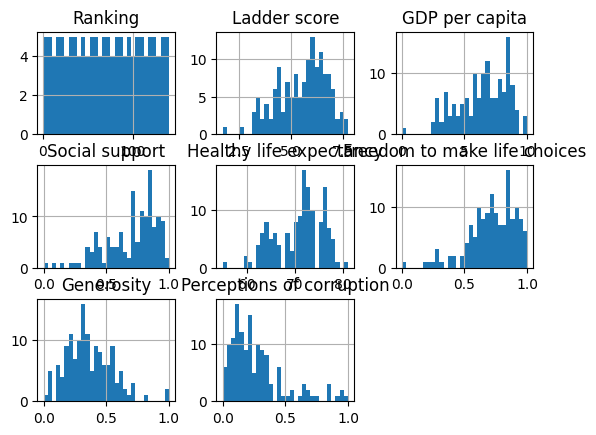

In [62]:
data_frame.hist(bins=30)


In [63]:
# Remove unnecessary columns -Ranking  , Regional Indicator

df_new = data_frame[['Ladder score','GDP per capita', 'Social support', 'Generosity', 'Perceptions of corruption']]
df_new.head()

,Ladder score,GDP per capita,Social support,Generosity,Perceptions of corruption
0,1.7210,2.93451,0.00000,0.22638,0.15383
1,5.3042,6.71748,0.57133,0.34403,0.08517
2,5.3635,6.18327,0.73652,0.22771,0.34775
3,6.1881,7.29612,0.85449,0.21822,0.13990
4,5.4549,6.74410,0.71415,0.12831,0.30090


Slope (m) : 0.457108519830765
Y intercept (b): 2.586494471899818


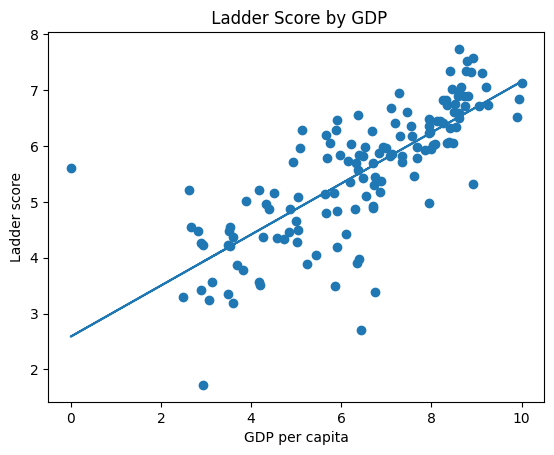

In [64]:
x= df_new['GDP per capita']
y= df_new['Ladder score']
plt.scatter(x,y)
plt.xlabel('GDP per capita')
plt.ylabel('Ladder score')
plt.title(' Ladder Score by GDP')
slope,intercept,rvalue,pvalue,stderr = stats.linregress(x,y)
print("Slope (m) :" ,slope)
print("Y intercept (b):", intercept)
plt.plot(x,slope*x+intercept)

### Notes 
As the GDP increases the happiness increases.  This is to be expected because both have a very similar skew in the histogram.  Using GDP it would be fairly simple to predict happiness score. using y=mx+b it would be <br>
y=0.45 x + 2.58  where x is the gdp and y will be the happiness score.

Slope (m) : 4.660636387559873
Y intercept (b): 2.2604926168426354


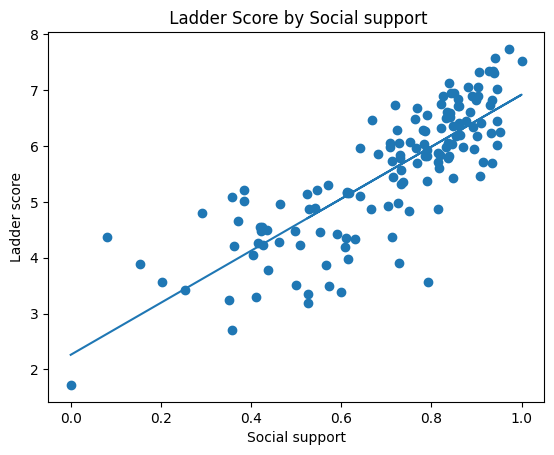

In [65]:
x= df_new['Social support']
y= df_new['Ladder score']
plt.scatter(x,y)
plt.xlabel('Social support')
plt.ylabel('Ladder score')
plt.title(' Ladder Score by Social support')
slope,intercept,rvalue,pvalue,stderr = stats.linregress(x,y)
print("Slope (m) :" ,slope)
print("Y intercept (b):", intercept)
plt.plot(x,slope*x+intercept)

### Notes 
Similar to GDP, as the Social support increases the happiness increases.  This is to be expected because both have a very similar skew in the histogram.  Using Social score it would be fairly simple to predict happiness score. using y=mx+b it would be <br>
y=0.46 x + 2.26  where x is the Social score and y will be the happiness score.

Slope (m) : 0.8378555535728484
Y intercept (b): 5.225001188780981


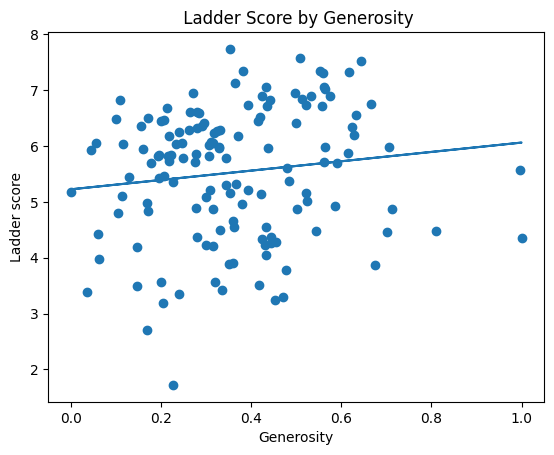

In [66]:
x= df_new['Generosity']
y= df_new['Ladder score']
plt.scatter(x,y)
plt.xlabel('Generosity')
plt.ylabel('Ladder score')
plt.title(' Ladder Score by Generosity')
slope,intercept,rvalue,pvalue,stderr = stats.linregress(x,y)
print("Slope (m) :" ,slope)
print("Y intercept (b):", intercept)
plt.plot(x,slope*x+intercept)

### Notes

The Ladder score is more difficulty to predict based on the Generosity score.  This is due to the fact that the ladder score seems to be nearly horizontal  or near 0.  This means that no matter what the value of Generosity it will be cancelled out by the slope of 0.  so the result will be y= b on any data input. 

### 

Slope (m) : 2.4302130501011976
Y intercept (b): 4.879609868320461


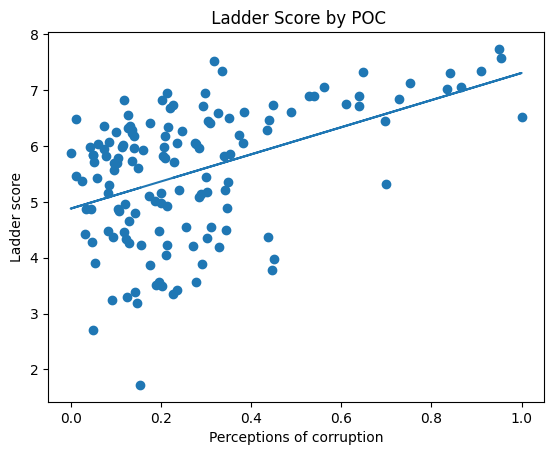

In [67]:
x= df_new['Perceptions of corruption']
y= df_new['Ladder score']
plt.scatter(x,y)
plt.xlabel('Perceptions of corruption')
plt.ylabel('Ladder score')
plt.title(' Ladder Score by POC')
slope,intercept,rvalue,pvalue,stderr = stats.linregress(x,y)
print("Slope (m) :" ,slope)
print("Y intercept (b):", intercept)
plt.plot(x,slope*x+intercept)

### Notes

This is probably the most suprising relationship.  We would expect that as Perceptions of corruption increased then the happiness/Ladder score would decrease, however the opposite is true.  People in contries with high perceptions of corruption tend to be happier due to the positive slope of 2.4.  

### Reflections

While exploring the data set we are not suprised by some of the relationships of Happiness/Ladder score.  We expect as GDP increases then people should rank their happiness higher.  Similarly with Social support.  However when people live in contries that have a high generosity score it doesn't necessarily mean they will rate their happiness higher.  Finally, and probably most suprisingly, Even if a country is perceived as corrupt it could still rank high in happiness. 

## Section 3.  Feature Selection

In an attempt to predict the happiness score based on features we will build a linear model that uses the following features.  <br>
GDP per capita, Social support score, Generosity score, and Perception of corruption score.  

### Reflections

These features have different relationships to the ladder score.  Developing a linear model that uses all of these features should give us a more accurate Ladder score than to use just one feature alone. 

### Section 4 Train a Model (Linear Regression)

#### 4.1 Split the data 

In [68]:
train_set, test_set = train_test_split(data_frame, test_size=0.2, random_state=123)
print(len(train_set), len(test_set))

112 28


#### 4.2 Train model using SciKit learn model.fit()

In [69]:
model = LinearRegression()

X = train_set[['GDP per capita', 'Social support','Perceptions of corruption','Generosity']]
y = train_set["Ladder score"]

In [70]:
model.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [71]:
print("The bias is " , model.intercept_)
print("The feature coefficients are ", model.coef_)
print("The R2 score for the training set is", model.score(X,y))

# Check the performance on the test set
X_test = test_set[['GDP per capita', 'Social support','Perceptions of corruption','Generosity']]
y_test = test_set["Ladder score"]

print("The R2 score for the test set is", model.score(X_test,y_test))

The bias is  1.8804231797975106
The feature coefficients are  [0.1842761  2.98123855 0.76203918 0.51119628]
The R2 score for the training set is 0.7443885178586233
The R2 score for the test set is 0.783767881050726


### Section 5 Implement Pipelines

#### 5.1 Imputer -> StandardScaler -> Linear Regression

In [72]:
howell_pipe = Pipeline([
    ('median_transform', SimpleImputer(strategy='median')),
    ('scale_transform', StandardScaler()),
    ('lin_reg', LinearRegression())])

howell_pipe.fit(X,y)
print("The stage bias is " ,
howell_pipe.named_steps['lin_reg'].intercept_)
print("The stage feature coefficients are ",
howell_pipe.named_steps['lin_reg'].coef_)
print("The R2 score for the test set is", howell_pipe.score(X_test,y_test))


The stage bias is  5.618350892857143
The stage feature coefficients are  [0.3687844  0.5732087  0.17161104 0.09442201]
The R2 score for the test set is 0.783767881050726


#### Notes

Using a pipeline we can csee that the feature coefficients are drastically different than a standard linear regression model

#### 5.2 Implement Pipeline 2: Imputer → Polynomial Features (degree=3) → StandardScaler → Linear Regression.

In [73]:

howell_poly_pipe = Pipeline([
    ('median_transform', SimpleImputer(strategy='median')),
    ('poly_transform', PolynomialFeatures(degree=3, include_bias=False)),
    ('scale_transform', StandardScaler()),
    ('lin_reg', LinearRegression())
])

# Fit the pipeline
howell_poly_pipe.fit(X, y)

# Access coefficients
print("The stage bias is", howell_poly_pipe.named_steps['lin_reg'].intercept_)
print("The stage feature coefficients are", howell_poly_pipe.named_steps['lin_reg'].coef_)
print("The R2 score for the test set is", howell_poly_pipe.score(X_test,y_test))

The stage bias is 5.618350892857128
The stage feature coefficients are [ 8.75161756e+00 -4.70074485e+00  2.84979632e+00  3.94421135e+00
 -1.21887764e+01  3.02666462e+00 -4.80157532e+00 -9.12823613e+00
  6.82844613e+00  4.46296793e-02  4.37984607e+00 -3.97806060e+00
 -1.75756750e-01 -3.57734674e+00 -1.15715351e+00  9.68102988e+00
  1.30797648e+01  3.99365605e+00 -5.76514330e+00 -1.23289671e+01
 -2.85452528e+00 -5.80412117e+00  1.11239146e-02  4.71605008e+00
 -2.94151073e+00  3.09766195e+00  8.67336217e-01  6.27098414e+00
  1.18423949e+00 -3.60673089e+00  1.67654531e+00 -1.73027212e-01
 -3.44580288e-01  1.30874350e+00]
The R2 score for the test set is 0.386104787063685


### Reflections

Comparing the R2 values of the Standard Linear Regression , Howell_Pipe, and Howell_poly pipe , we find that the First two models perform exactly the same while the Howell_poly_pipe performs very poorly.  When we look at the drastic range between all of coefficients we can see that any one of these could change the prediction so drastically it would be difficult to guess correctly.  This is most likely a case of overfitting, that the model is trying to do too much. 

### Section 6 Conclusions

Creating a Linear regression model using 4 features provides us with enough information to have an R2 score of 0.78.<br>

Creating a pipeline to improve the score on the data did not really help since there was not any missing data which the Imputer could have solved.  Adding a scaler to the pipeline did increase the coefficients for the howell_pipe model but the end result of predicing correctly was exactly the same as the original Linear Model. <br>

When we add a polynomial transform to the data and then create a linear model it  seems to only complicate the model to the point of being less effective. 